In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create a path

path = r'C:\Users\Owner\Desktop\Data Analyst\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_new.csv'))

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_vaccinations', ylabel='Density'>

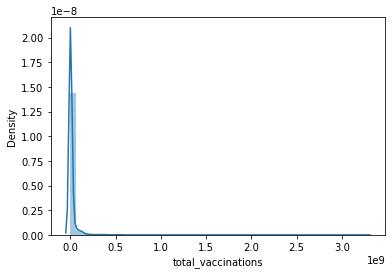

In [4]:
sns.distplot(df['total_vaccinations'], bins=50) # Shows extreme values

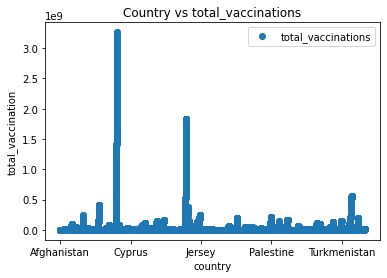

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. Country vs total_vaccinations
df.plot(x = 'country', y='total_vaccinations',style='o')
plt.title('Country vs total_vaccinations')  
plt.xlabel('country')  
plt.ylabel('total_vaccination')  
plt.show()

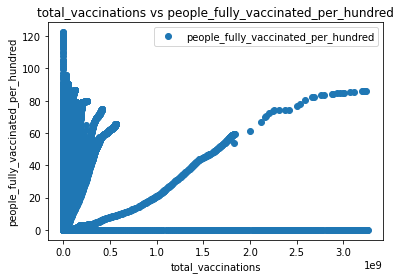

In [6]:
# 2. total_vaccinations vs people_fully_vaccinated_per_hundred
df.plot(x = 'total_vaccinations', y='people_fully_vaccinated_per_hundred',style='o')
plt.title('total_vaccinations vs people_fully_vaccinated_per_hundred')  
plt.xlabel('total_vaccinations')  
plt.ylabel('people_fully_vaccinated_per_hundred')  
plt.show()


In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df[['people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'people_vaccinated_per_hundred', 
            'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']].values.reshape(-1,1)
y = df['total_vaccinations'].values.reshape(-1,1)

In [23]:
X

array([[   0.  ],
       [   0.  ],
       [   0.  ],
       ...,
       [  33.48],
       [  23.26],
       [6874.  ]])

In [24]:
y

array([[      0.],
       [      0.],
       [      0.],
       ...,
       [8845039.],
       [8934360.],
       [9039729.]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [605584, 86512]

In [12]:
# Create a regression object.

regression = LinearRegression() 

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

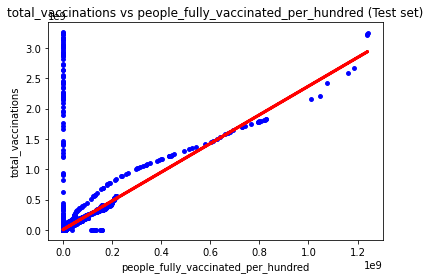

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('total_vaccinations vs people_fully_vaccinated_per_hundred (Test set)')
plot_test.xlabel('people_fully_vaccinated_per_hundred')
plot_test.ylabel('total_vaccinations')
plot_test.show()

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Print the model summary statistics. T

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.36014233]]
Mean squared error:  1.6691663259178798e+16
R2 score:  0.3073162627913423


### R2 score is low which means the model is poor fit. But I dont think i will be using this model for my analysis

In [18]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [19]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [20]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.36014233]]
Mean squared error:  1.7831463668015866e+16
R2 score:  0.33338178043582634


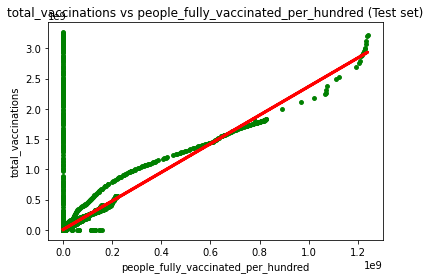

In [21]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('total_vaccinations vs people_fully_vaccinated_per_hundred (Test set)')
plot_test.xlabel('people_fully_vaccinated_per_hundred')
plot_test.ylabel('total_vaccinations')
plot_test.show()

### Both training set and test set are similar. I would need to explore and use different method for my analysis as I need to track the vaccination rate by country name. 